In [1]:
##1(a):
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",names=['id','class','mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'])


In [2]:
feature = ['id','class','mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension']

y_feature = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension']
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [3]:
##1(b)i
## Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs
from sklearn import preprocessing
import numpy as np
for i in range(1,31):
    print(i)
    test=pd.DataFrame()
    test_b = data.loc[data['class'] == 'B'].sample(frac=0.20,random_state=123)
    test_m = data.loc[data['class'] == 'M'].sample(frac=0.20,random_state=123)
    test = pd.concat([test, test_b, test_m], names=feature)
    train = data.loc[~data.index.isin(test.index), :]
    test.reset_index(drop=True,inplace=True)
    train.reset_index(drop=True,inplace=True)
    xtrain = train.drop(["id", "class"],axis=1)
    xtest = test.drop(["id", "class"],axis=1) 
    ytrain = train[['class']]
    ytest = test[['class']]
    nor_xtrain = preprocessing.normalize(xtrain)
    nor_xtest = preprocessing.normalize(xtest)
    c_range = np.logspace(-3,6,10)
    p = {'C':c_range}
    CV = StratifiedShuffleSplit(n_splits=5, random_state=123)
    Svm = LinearSVC(penalty='l1',dual=False)
    grid = GridSearchCV(Svm, param_grid=p, cv=CV)
    grid.fit(nor_xtrain,ytrain)
    train_pred = grid.predict(nor_xtrain)
    test_pred = grid.predict(nor_xtest)
    
    
    ##accuracy score
    accuracy_train = []
    accuracy_test = []
    accuracy_train.append(accuracy_score(ytrain,train_pred))
    accuracy_test.append(accuracy_score(ytest,test_pred))
    
    ##precision score
    precision_train = []
    precision_test = []
    precision_train.append(precision_score(ytrain,train_pred,pos_label='B'))
    precision_test.append(precision_score(ytest,test_pred,pos_label='B'))
    
    ##recall score
    recall_train = []
    recall_test = []
    recall_train.append(recall_score(ytrain,train_pred,pos_label='B'))
    recall_test.append(recall_score(ytest,test_pred,pos_label='B'))
    
    ##F1 score
    f_train = []
    f_test = []
    f_train.append(f1_score(ytrain,train_pred,pos_label='B'))
    f_test.append(f1_score(ytest,test_pred,pos_label='B'))
    
    ##auc
    auc_train = []
    auc_test = []
    auc_train.append(roc_auc_score(ytrain,grid.decision_function(nor_xtrain)))
    auc_test.append(roc_auc_score(ytest,grid.decision_function(nor_xtest)))
    
    
    
    
    
    
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [9]:
print("average of accuracy score for train dataset is " + str(np.mean(accuracy_train)))
print("average of accuracy score for test dataset is " + str(np.mean(accuracy_test)))
print("average of precision score for train dataset is " + str(np.mean(precision_train)))
print("average of precision score for test dataset is " + str(np.mean(precision_test)))
print("average of recall score for train dataset is " + str(np.mean(recall_train)))
print("average of recall score for test dataset is " + str(np.mean(recall_test)))
print("average of f1 score for train dataset is " + str(np.mean(f_train)))
print("average of f1 score for test dataset is " + str(np.mean(f_test)))
print("average of auc score for train dataset is " + str(np.mean(auc_train)))
print("average of auc score for test dataset is " + str(np.mean(auc_test)))


average of accuracy score for train dataset is 0.9824561403508771
average of accuracy score for test dataset is 0.6283185840707964
average of precision score for train dataset is 0.9826388888888888
average of precision score for test dataset is 0.6283185840707964
average of recall score for train dataset is 0.9895104895104895
average of recall score for test dataset is 1.0
average of f1 score for train dataset is 0.9860627177700347
average of f1 score for test dataset is 0.7717391304347826
average of auc score for train dataset is 0.998704236939531
average of auc score for test dataset is 0.948692152917505


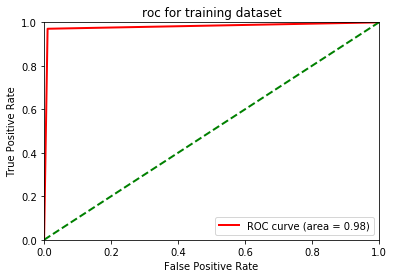

In [11]:
##1(b)i
##Plot the ROC for training dataset
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
%matplotlib inline
lw=2
fpr, tpr, thresholds = roc_curve(label_binarize(ytrain, classes=['B','M'], neg_label=0, pos_label=1),
                                 label_binarize(train_pred, classes=['B','M'], neg_label=0, pos_label=1))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc for training dataset')
plt.legend(loc="lower right")
plt.show()

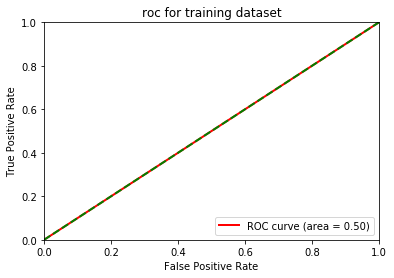

In [16]:
##plot roc for testing dataset
lw=2
fpr, tpr, thresholds = roc_curve(label_binarize(ytest, classes=['B','M'], neg_label=0, pos_label=1),
                                 label_binarize(test_pred, classes=['B','M'], neg_label=0, pos_label=1))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc for training dataset')
plt.legend(loc="lower right")
plt.show()

In [17]:
##1(b)i
##confusion matrix for training dataset
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,train_pred)

array([[283,   3],
       [  5, 165]], dtype=int64)

In [18]:
##confusion matrix for testing dataset
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,test_pred)

array([[71,  0],
       [42,  0]], dtype=int64)

In [93]:
##1(b)ii
for i in range(1,31):
    print(i)
    test=pd.DataFrame()
    test_b = data.loc[data['class'] == 'B'].sample(frac=0.20,random_state=123)
    test_m = data.loc[data['class'] == 'M'].sample(frac=0.20,random_state=123)
    test = pd.concat([test, test_b, test_m], names=feature)
    train = data.loc[~data.index.isin(test.index), :]
    test.reset_index(drop=True,inplace=True)
    train.reset_index(drop=True,inplace=True)
    
    test= test.drop(['id'], axis=1)
    train = train.drop(['id'], axis=1)
    xtest = test.drop(["class"],axis=1) 
    ytest = test[['class']]
    nor_xtest2 = preprocessing.normalize(xtest)
    
    
    labeltrainB = train.loc[data['class'] == 'B'].sample(frac=0.50,random_state=123)
    labeltrainM = train.loc[data['class'] == 'M'].sample(frac=0.50,random_state=123)
    labeltrain = pd.concat([pd.DataFrame(), labeltrainB, labeltrainM], names=feature)
    unlabeltrain = train.loc[~train.index.isin(labeltrain.index), :]
    unlabeltrain = unlabeltrain.drop(['class'],axis=1)
    
    while len(unlabeltrain)>0:
        x_labeltrain = labeltrain.drop(["class"],axis=1)
        y_labeltrain = labeltrain[["class"]]
        nor_x_labeltrain = preprocessing.normalize(x_labeltrain)
        c_range = np.logspace(-3,6,10)
        p = {'C':c_range}
        CV = StratifiedShuffleSplit(n_splits=5, random_state=123)
        Svm = LinearSVC(penalty='l1',dual=False)
        grid = GridSearchCV(Svm, param_grid=p, cv=CV)
        grid.fit(nor_x_labeltrain,y_labeltrain)
        labeling = unlabeltrain.iloc[abs(grid.decision_function(unlabeltrain)).argsort()[::-1][:1]]
        unlabeltrain = unlabeltrain.loc[~unlabeltrain.index.isin(labeling.index), :]
        labeling['class'] = grid.predict(labeling)[0]
        labeltrain = pd.concat([labeltrain,labeling])
        
    xtrain2=labeltrain.drop(["class"],axis=1)
    ytrain2=labeltrain[['class']]
    nor_xtrain2 = preprocessing.normalize(xtrain2)
    
    c_range = np.logspace(-3,6,10)
    p = {'C':c_range}
    CV = StratifiedShuffleSplit(n_splits=5, random_state=123)
    Svm = LinearSVC(penalty='l1',dual=False)
    grid = GridSearchCV(Svm, param_grid=p, cv=CV)
    grid.fit(nor_xtrain2,ytrain2)
    train_pred2 = grid.predict(nor_xtrain2)
    test_pred2 = grid.predict(nor_xtest2)
    
    
    ##accuracy score
    accuracy_train2 = []
    accuracy_test2 = []
    accuracy_train2.append(accuracy_score(ytrain2,train_pred2))
    accuracy_test2.append(accuracy_score(ytest,test_pred2))
    
    ##precision score
    precision_train2 = []
    precision_test2 = []
    precision_train2.append(precision_score(ytrain2,train_pred2,pos_label='B'))
    precision_test2.append(precision_score(ytest,test_pred2,pos_label='B'))
    
    ##recall score
    recall_train2 = []
    recall_test2 = []
    recall_train2.append(recall_score(ytrain2,train_pred2,pos_label='B'))
    recall_test2.append(recall_score(ytest,test_pred2,pos_label='B'))
    
    ##F1 score
    f_train2 = []
    f_test2 = []
    f_train2.append(f1_score(ytrain2,train_pred2,pos_label='B'))
    f_test2.append(f1_score(ytest,test_pred2,pos_label='B'))
    
    ##auc
    auc_train2 = []
    auc_test2 = []
    auc_train2.append(roc_auc_score(ytrain2,grid.decision_function(nor_xtrain2)))
    auc_test2.append(roc_auc_score(ytest,grid.decision_function(nor_xtest2)))
    
    
    
        
        
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [245]:
print("average of accuracy score for train dataset is " + str(np.mean(accuracy_train2)))
print("average of accuracy score for test dataset is " + str(np.mean(accuracy_test2)))
print("average of precision score for train dataset is " + str(np.mean(precision_train2)))
print("average of precision score for test dataset is " + str(np.mean(precision_test2)))
print("average of recall score for train dataset is " + str(np.mean(recall_train2)))
print("average of recall score for test dataset is " + str(np.mean(recall_test2)))
print("average of f1 score for train dataset is " + str(np.mean(f_train2)))
print("average of f1 score for test dataset is " + str(np.mean(f_test2)))
print("average of auc score for train dataset is " + str(np.mean(auc_train2)))
print("average of auc score for test dataset is " + str(np.mean(auc_test2)))


average of accuracy score for train dataset is 0.7807017543859649
average of accuracy score for test dataset is 0.831858407079646
average of precision score for train dataset is 0.7855153203342619
average of precision score for test dataset is 0.7888888888888889
average of recall score for train dataset is 0.9245901639344263
average of recall score for test dataset is 1.0
average of f1 score for train dataset is 0.8493975903614457
average of f1 score for test dataset is 0.8819875776397516
average of auc score for train dataset is 0.8206926500922811
average of auc score for test dataset is 0.8846411804158284


In [95]:
##confusion matrix for training dataset
confusion_matrix(ytrain2,train_pred2)

array([[282,  23],
       [ 77,  74]], dtype=int64)

In [103]:
##confusion matrix for testing dataset
confusion_matrix(ytest,test_pred2)

array([[71,  0],
       [19, 23]], dtype=int64)

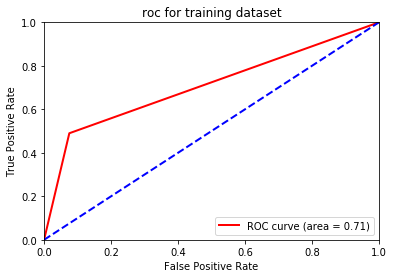

In [105]:
##1(b)ii
##Plot the ROC for training dataset
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
lw=2
fpr, tpr, thresholds = roc_curve(label_binarize(ytrain2, classes=['B','M'], neg_label=0, pos_label=1),
                                 label_binarize(train_pred2, classes=['B','M'], neg_label=0, pos_label=1))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc for training dataset')
plt.legend(loc="lower right")
plt.show()

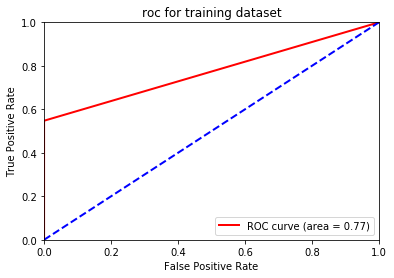

In [104]:
##1(b)ii
##Plot the ROC for testing dataset
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
lw=2
fpr, tpr, thresholds = roc_curve(label_binarize(ytest, classes=['B','M'], neg_label=0, pos_label=1),
                                 label_binarize(test_pred2, classes=['B','M'], neg_label=0, pos_label=1))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc for training dataset')
plt.legend(loc="lower right")
plt.show()

In [19]:
##1(b)iii A&B
##How do you make sure that the algorithm was not trapped in a local minimum?
##Ans: drop the local minimum data in training after finding one closest data point. I show it in below code. 


from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
for i in range(1,31):
    group0 = []
    group1= []
    test=pd.DataFrame()
    test_b = data.loc[data['class'] == 'B'].sample(frac=0.20,random_state=123)
    test_m = data.loc[data['class'] == 'M'].sample(frac=0.20,random_state=123)
    test = pd.concat([test, test_b, test_m], names=feature)
    train = data.loc[~data.index.isin(test.index), :]
    test.reset_index(drop=True,inplace=True)
    train.reset_index(drop=True,inplace=True)
    
    test_dropid= test.drop(['id'], axis=1)
    train_dropid = train.drop(['id'], axis=1)
    train = train.drop(['class','id'], axis=1)
    
    kmeans = KMeans(n_clusters=2, random_state=123)
    k = kmeans.fit_predict(train)
    c_group = kmeans.cluster_centers_
    data0 = train[k==0]
    data1 = train[k==1]
    for j in range(1,31):
        np_data0 = np.array(data0)
        np_data1 = np.array(data1)
        min_dis_0 = pairwise_distances_argmin(c_group,np_data0)
        min_dis_1 = pairwise_distances_argmin(c_group,np_data1)
        group0.append(min_dis_0[0])
        group1.append(min_dis_1[1])
        data0 = data0.drop(data0.index[min_dis_0[0]])
        data1 = data1.drop(data1.index[min_dis_1[1]])
    data0 = pd.concat([data0,train.ix[group0]])
    data1 = pd.concat([data1,train.ix[group1]])
    data0_class = train_dropid.ix[group0]
    data1_class = train_dropid.ix[group1] 
    data0["class"] = [data0_class["class"].value_counts().keys()[0]]*len(data0)
    data1["class"] = [data1_class["class"].value_counts().keys()[0]]*len(data1)
    new_data =  pd.concat([data0,data1])
    
    ##accuracy score
    accuracy_train1=[]
    accuracy_train1.append(accuracy_score(train_dropid['class'],new_data['class']))
    
    ##precision score
    precision_train1=[]
    precision_train1.append(precision_score(train_dropid['class'],new_data['class'],pos_label='B'))
    
    ##accuracy score
    recall_train1=[]
    recall_train1.append(recall_score(train_dropid['class'],new_data['class'],pos_label='B'))
    
    ##f1 score
    f_train1=[]
    f_train1.append(f1_score(train_dropid['class'],new_data['class'],pos_label='B'))
    
    ##auc score
    auc_train1=[]
    pred_data = label_binarize(new_data["class"], classes=['B','M'], neg_label=0, pos_label=1)
    true_data = label_binarize(train_dropid["class"], classes=['B','M'], neg_label=0, pos_label=1)
    auc_train1.append(roc_auc_score(true_data,pred_data))

data0_classeses = data0_class.to_csv('combined_data.csv')
data1_classeses = data1_class.to_csv('combined_data1.csv')

In [20]:
print("average accuracy score in training is " + str(np.mean(accuracy_train1)))
print("Average precision score in training is  " + str(np.mean(precision_train1)))
print("average recall score in training is " + str(np.mean(recall_train1)))
print("average f score in training is " + str(np.mean(f_train1)))
print("average roc_auc_score in training is " + str(np.mean(auc_train1)))

average accuracy score in training is 0.48903508771929827
Average precision score in training is  0.5750708215297451
average recall score in training is 0.7097902097902098
average f score in training is 0.6353677621283256
average roc_auc_score in training is 0.4137186343068696


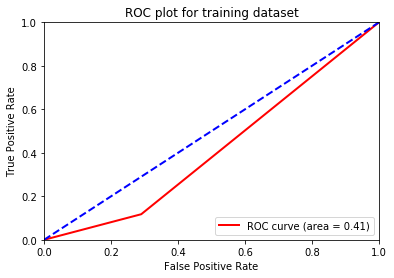

In [21]:
##roc auc curve for training dataset
lw=2
fpr, tpr, thresholds = roc_curve(true_data,pred_data)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot for training dataset')
plt.legend(loc="lower right")
plt.show()

In [22]:
##confusion matrix for training dataset
confusion_matrix(train_dropid["class"], new_data["class"])

array([[203,  83],
       [150,  20]], dtype=int64)

In [28]:
##1(b)iii C
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
for i in range(1,31):
    test=pd.DataFrame()
    test_b = data.loc[data['class'] == 'B'].sample(frac=0.20,random_state=123)
    test_m = data.loc[data['class'] == 'M'].sample(frac=0.20,random_state=123)
    test = pd.concat([test, test_b, test_m], names=feature)
    train = data.loc[~data.index.isin(test.index), :]
    test.reset_index(drop=True,inplace=True)
    train.reset_index(drop=True,inplace=True)
    
    test_dropid= test.drop(['id'], axis=1)
    train_dropid = train.drop(['id'], axis=1)
    test = test.drop(['class','id'], axis=1)
    train = train.drop(['class','id'], axis=1)
    kmeans = KMeans(n_clusters=2, random_state=123)
    kk = kmeans.fit_predict(test)
    k_test = kmeans.fit_predict(test)
    c_group_test = kmeans.cluster_centers_
    data0_test = test[kk==0]
    data1_test = test[kk==1]
    np_data0_test = np.array(data0_test)
    np_data1_test = np.array(data1_test)
    min_to_center_0_test = pairwise_distances_argmin(c_group_test,np_data0_test)[0]
    min_to_center_1_test = pairwise_distances_argmin(c_group_test,np_data1_test)[0]
    
    cluster_0_dropid_test = test_dropid.ix[[min_to_center_0_test]]
    cluster_1_dropid_test = test_dropid.ix[[min_to_center_1_test]]
    
    data0_test['class'] = [cluster_0_dropid_test["class"].value_counts().keys()[0]]*len(data0_test)
    data1_test['class'] = [cluster_1_dropid_test["class"].value_counts().keys()[0]]*len(data1_test)
    new_data_test =  pd.concat([data0_test,data1_test])
    
    ##accuracy score
    accuracy_test1=[]
    accuracy_test1.append(accuracy_score(test_dropid['class'],new_data_test['class']))
    
    ##precision score
    precision_test1=[]
    precision_test1.append(precision_score(test_dropid['class'],new_data_test['class'],pos_label='B'))
    
    ##accuracy score
    recall_test1=[]
    recall_test1.append(recall_score(test_dropid['class'],new_data_test['class'],pos_label='B'))
    
    ##f1 score
    f_test1=[]
    f_test1.append(f1_score(test_dropid['class'],new_data_test['class'],pos_label='B'))
    
    ##auc score
    auc_test1=[]
    pred_data_test = label_binarize(new_data_test["class"], classes=['B','M'], neg_label=0, pos_label=1)
    true_data_test = label_binarize(test_dropid["class"], classes=['B','M'], neg_label=0, pos_label=1)
    auc_test1.append(roc_auc_score(true_data_test,pred_data_test))

In [29]:
print("average accuracy score in testing is " + str(np.mean(accuracy_test1)))
print("Average precision score in testing is  " + str(np.mean(precision_test1)))
print("average recall score in testing is " + str(np.mean(recall_test1)))
print("average f score in testing is " + str(np.mean(f_test1)))
print("average roc_auc_score in testing is " + str(np.mean(auc_test1)))

average accuracy score in testing is 0.6283185840707964
Average precision score in testing is  0.6283185840707964
average recall score in testing is 1.0
average f score in testing is 0.7717391304347826
average roc_auc_score in testing is 0.5


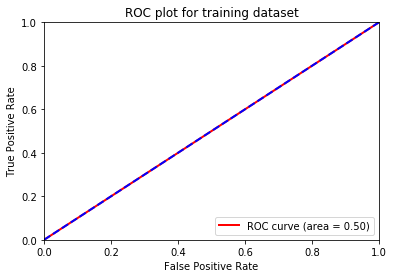

In [30]:
##roc auc curve for testing dataset
lw=2
fpr, tpr, thresholds = roc_curve(true_data_test,pred_data_test)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot for training dataset')
plt.legend(loc="lower right")
plt.show()

In [32]:
##confusion matrix for testing dataset
confusion_matrix(test_dropid["class"], new_data_test["class"])

array([[71,  0],
       [42,  0]], dtype=int64)

In [35]:
##1b(iv)
##repeat 1b(iii)B using SpectralClustering
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
%matplotlib inline

for i in range(0,31):
    Group0_list = []
    Group1_list = []
    testbb = data.loc[data['class'] == 'B'].sample(frac=0.20)
    testmm = data.loc[data['class'] == 'M'].sample(frac=0.20)
    test22 = pd.concat([pd.DataFrame(), testbb, testmm], names=feature)

    train22 = data.loc[~data.index.isin(test22.index), :]

    train22.reset_index(drop=True,inplace=True)
    test22.reset_index(drop=True,inplace=True)
    test22 = test22.drop(['class'], axis=1)
    train22 = train22.drop(['class'], axis=1)
    test_dropid2 = test22.drop(['id'], axis=1)
    train_dropid2 = train22.drop(['id'], axis=1)


    
    Groups = SpectralClustering(n_clusters=2,affinity='rbf',n_init=5,random_state=123).fit(train22).labels_
            
    Group0 = train22[Groups == 0]
    Group1 = train22[Groups == 1]
    Group0_30 = []
    Group1_30 = []
    centroid = []
    
    for a in Group0.columns:
        Group0_list.append(np.mean(Group0[a]))
        
    for b in Group1.columns:
        Group1_list.append(np.mean(Group1[b]))
        
    centroid.append(Group0_list)
    centroid.append(Group1_list)
    
    np_group0 = np.array(Group0)
    np_group1 = np.array(Group1)
    for i in range(0,30):
        if len(Group0)>0 and len(Group1)>0:
            min_dis_0 = pairwise_distances_argmin(centroid,np_group0)
            Group0_30.append(min_dis_0[0])
            Group0 = Group0.drop(Group0.index[min_dis_0[0]])        
            min_dis_1 = pairwise_distances_argmin(centroid,np_group1)
            Group1_30.append(min_dis_1[1])
            Group1 = Group1.drop(Group1.index[min_dis_1[1]])

    
    
    Group0 = pd.concat([Group0,train_dropid2.ix[Group0_30]])
    Group1 = pd.concat([Group1,train_dropid2.ix[Group1_30]])


    Group0["class"] = ['B']*len(Group0)
    Group1["class"] = ['M']*len(Group1)
    
    new_data_d = pd.concat([Group0,Group1])
    
     ##accuracy score
    accuracy_train2=[]
    accuracy_train2.append(accuracy_score(train_dropid['class'],new_data_d['class']))
    
    ##precision score
    precision_train2=[]
    precision_train2.append(precision_score(train_dropid['class'],new_data_d['class'],pos_label='B'))
    
    ##accuracy score
    recall_train2=[]
    recall_train2.append(recall_score(train_dropid['class'],new_data_d['class'],pos_label='B'))
    
    ##f1 score
    f_train2=[]
    f_train2.append(f1_score(train_dropid['class'],new_data_d['class'],pos_label='B'))
    
    ##auc score
    auc_train2=[]
    pred_data_d = label_binarize(new_data_d["class"], classes=['B','M'], neg_label=0, pos_label=1)
    true_data_d = label_binarize(train_dropid["class"], classes=['B','M'], neg_label=0, pos_label=1)
    auc_train2.append(roc_auc_score(true_data_d,pred_data_d))
    
    
    


In [36]:
print("average accuracy score in training is " + str(np.mean(accuracy_train2)))
print("Average precision score in training is  " + str(np.mean(precision_train2)))
print("average recall score in training is " + str(np.mean(recall_train2)))
print("average f score in training is " + str(np.mean(f_train2)))
print("average roc_auc_score in training is " + str(np.mean(auc_train2)))

average accuracy score in training is 0.6271929824561403
Average precision score in training is  0.6277533039647577
average recall score in training is 0.9965034965034965
average f score in training is 0.7702702702702702
average roc_auc_score in training is 0.5011929247223365


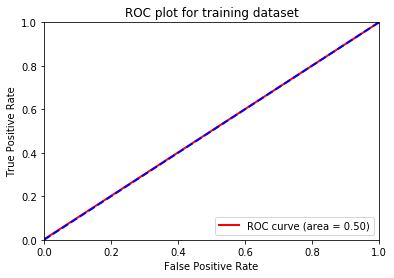

In [37]:
##roc auc curve for training dataset in spectral clustering
lw=2
fpr, tpr, thresholds = roc_curve(true_data_d,pred_data_d)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot for training dataset')
plt.legend(loc="lower right")
plt.show()

In [41]:
##confusion matrix for training dataset in spectral clustering
from sklearn.metrics import confusion_matrix
confusion_matrix(train_dropid["class"], new_data_d["class"])

array([[285,   1],
       [169,   1]], dtype=int64)

In [63]:
##repeat 1b(iii)C using SpectralClustering
for i in range(1,31):
    test=pd.DataFrame()
    test_b = data.loc[data['class'] == 'B'].sample(frac=0.20,random_state=123)
    test_m = data.loc[data['class'] == 'M'].sample(frac=0.20,random_state=123)
    test = pd.concat([test, test_b, test_m], names=feature)
    train = data.loc[~data.index.isin(test.index), :]
    test.reset_index(drop=True,inplace=True)
    train.reset_index(drop=True,inplace=True)
    
    test_dropid= test.drop(['id'], axis=1)
    train_dropid = train.drop(['id'], axis=1)
    test = test.drop(['class','id'], axis=1)
    train = train.drop(['class','id'], axis=1)
    spectral_dd = SpectralClustering(n_clusters=2,affinity='rbf',assign_labels="discretize",random_state=123).fit(test)
    label_dd = spectral_dd.labels_
    data0_dd = test[label_dd==0]
    data1_dd = test[label_dd==1]
    c_group0_dd = []
    c_group1_dd = []
    np_data0_dd = np.array(data0_dd)
    np_data1_dd = np.array(data1_dd)
    group_combined_dd = [[39.846290909090904, 0.02544898181818181, 0.01218469090909091, 0.030641181818181817, 0.0035111454545454553, 31309118.70909091, 662.3654545454544, 0.10243527272727271, 0.049537309090909094, 0.08520474545454544, 0.06229236363636366, 92.48945454545456, 14.203799999999998, 0.09570945454545456, 0.18068727272727267, 19.160727272727275, 2.8740345454545455, 0.40481272727272716, 0.007255618181818182, 0.021281090909090913, 1.1774527272727273, 884.7745454545453, 0.2513689090909091, 0.11718127272727273, 0.2570078181818182, 0.08197345454545454, 107.79145454545457, 16.350581818181816, 0.13149018181818176, 0.29659454545454544], [45.86898275862069, 0.026979224137931034, 0.01172339655172414, 0.03714381034482759, 0.004395896551724138, 9863706.431034483, 627.7431034482759, 0.10962189655172414, 0.048336500000000004, 0.09317182758620689, 0.06493362068965518, 89.60620689655174, 13.742810344827586, 0.10030999999999998, 0.18664999999999998, 19.270862068965517, 3.1129258620689653, 0.4395982758620689, 0.007295103448275862, 0.02169825862068966, 1.3384879310344826, 822.6844827586207, 0.24723965517241384, 0.10800775862068965, 0.25928344827586214, 0.08564310344827585, 103.25206896551725, 15.617379310344825, 0.13318793103448276, 0.28436551724137926]]
    
   
    group0_dd= []
    group1_dd= []
    if len(data0_dd)>0 and len(data1_dd)>0:
        min_to_center_0_ddd = pairwise_distances_argmin(group_combined_dd,np_data0_dd)[0]
        min_to_center_1_dd = pairwise_distances_argmin(group_combined_dd,np_data1_dd)[0]
    
    cluster_0_dropid_dd = test_dropid.ix[[min_to_center_0_ddd]]
    cluster_1_dropid_dd = test_dropid.ix[[min_to_center_1_dd]]
    
    data0_dd['class'] = [cluster_0_dropid_dd["class"].value_counts().keys()[0]]*len(data0_dd)
    data1_dd['class'] = [cluster_1_dropid_dd["class"].value_counts().keys()[0]]*len(data1_dd)
    new_data_dd =  pd.concat([data0_dd,data1_dd])
    ##accuracy score
    accuracy_test3=[]
    accuracy_test3.append(accuracy_score(test_dropid['class'],new_data_dd['class']))
    
    ##precision score
    precision_test3=[]
    precision_test3.append(precision_score(test_dropid['class'],new_data_dd['class'],pos_label='B'))
    
    ##accuracy score
    recall_test3=[]
    recall_test3.append(recall_score(test_dropid['class'],new_data_dd['class'],pos_label='B'))
    
    ##f1 score
    f_test3=[]
    f_test3.append(f1_score(test_dropid['class'],new_data_dd['class'],pos_label='B'))
    
    ##auc score
    auc_test3=[]
    pred_data_test3 = label_binarize(new_data_dd["class"], classes=['B','M'], neg_label=0, pos_label=1)
    true_data_test3 = label_binarize(test_dropid["class"], classes=['B','M'], neg_label=0, pos_label=1)
    auc_test3.append(roc_auc_score(true_data_test3,pred_data_test3))
    


In [64]:
print("average accuracy score in testing is " + str(np.mean(accuracy_test3)))
print("Average precision score in testing is  " + str(np.mean(precision_test3)))
print("average recall score in testing is " + str(np.mean(recall_test3)))
print("average f score in testing is " + str(np.mean(f_test3)))
print("average roc_auc_score in testing is " + str(np.mean(auc_test3)))

average accuracy score in testing is 0.6283185840707964
Average precision score in testing is  0.6283185840707964
average recall score in testing is 1.0
average f score in testing is 0.7717391304347826
average roc_auc_score in testing is 0.5


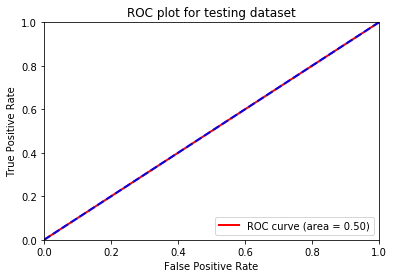

In [65]:
lw=2
fpr, tpr, thresholds = roc_curve(true_data_test3,pred_data_test3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot for testing dataset')
plt.legend(loc="lower right")
plt.show()    

In [66]:
##confusion matrix for testing dataset in spectral clustering
confusion_matrix(test_dropid["class"], new_data_dd["class"])

array([[71,  0],
       [42,  0]], dtype=int64)

In [67]:
##1(v)
##By comparing above result,
##we learn that semi-supervised method has best average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix
##since scores for them in semi-supervised are highest.
##Thus, semi-supervised method work best among supervised, semi-supervised,unsupervised,spectral.

In [3]:
##2(a)
Data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt",names=["variance", "skewness", "curtosis", "entropy", "class"])
Test = Data.sample(frac=472/1372,random_state=123)
Train = Data.loc[~Data.index.isin(Test.index), :]

In [4]:
##2(b)i
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
X_train = Train.drop(["class"],axis=1)
X_test = Test.drop(["class"],axis=1)
Y_train = Train[['class']]
Y_test = Test[['class']]
error_svm = {}
for i in range(1,51):
    print(i)
    error_list = []
    crange = np.logspace(-3,6,10)
    c_dict = {'C':crange}
    new_dataset = pd.DataFrame()
    for j in range(1,91):
        ten_data = Train.sample(n=10,replace=False)
        new_dataset = pd.concat([new_dataset,ten_data])
        x_ten_train = new_dataset.drop(["class"],axis=1)
        x_ten_test = new_dataset[['class']]
        CV = KFold(n_splits=5)
        Svm = LinearSVC(penalty='l1',dual=False)
        grid = GridSearchCV(Svm, param_grid=c_dict, cv=CV)
        grid.fit(x_ten_train,x_ten_test)
        error_test = 1-grid.score(X_test,Y_test)
        error_list.append(error_test)
    error_svm[i]=np.mean(error_list) 
        
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [6]:
##2(b)ii
error_svm2 = {}
for i in range(1,51):
    print(i)
    error_list2 = []
    crange2 = np.logspace(-3,6,10)
    c_dict2 = {'C':crange2}
    new_dataset2 = pd.DataFrame()
    ten_train_class0 = Train.loc[Train['class'] == 0].sample(n=5)
    ten_train_class1 = Train.loc[Train['class'] == 1].sample(n=5)
    for j in range(1,91):
        new_dataset2 = pd.concat([new_dataset2,ten_train_class0,ten_train_class1])
        x_ten_train2 = new_dataset2.drop(["class"],axis=1)
        x_ten_test2 = new_dataset2[['class']]
        CV = KFold(n_splits=5)
        Svm = LinearSVC(penalty='l1',dual=False)
        grid = GridSearchCV(Svm, param_grid=c_dict2, cv=CV)
        grid.fit(x_ten_train2,x_ten_test2)
        error_test2 = 1-grid.score(X_test,Y_test)
        error_list2.append(error_test2)
        ten_train_class0 = Train.iloc[abs(grid.decision_function(Train.drop(["class"], axis=1))).argsort()[:10],:]
        ten_train_class1 = pd.DataFrame()
    error_svm2[i]=np.mean(error_list2)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [54]:
##2(c)
res_passive = [] 
for key in error_svm.keys() : 
    res_passive.append(error_svm[key]) 
result_passive = []
for i in error_list : 
    result_passive.append(np.mean(i))

In [55]:
res_active = [] 
for key in error_svm2.keys() : 
    res_active.append(error_svm2[key]) 
result_active = []
for i in error_list2 : 
    result_active.append(np.mean(i))

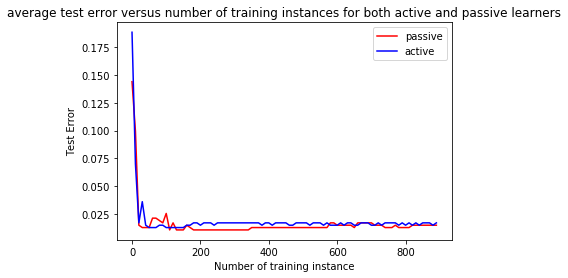

In [62]:
training_instance = [i*10 for i in range(90)]
plt.xlabel('Number of training instance')
plt.ylabel('Test Error')
plt.plot(training_instance, result_passive, 'red', label="passive")
plt.plot(training_instance, result_active, 'blue', label="active")
plt.title('average test error versus number of training instances for both active and passive learners')
plt.legend()
plt.show()
##the differences in test error between passive learning and active learning are minor. They are both very small, with small
##extent of fluctations. Moreover, with number of increasing training instances, test error gradually dramatically first,
##then decrease very slowly,approaching to zero.